## Задание 1

[kaggle task](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

Есть датасет с характеристиками покупателей в магазине.
<br>
Требуется разбить покупателей на k кластеров (выбор k остается за тобой), посчитать силуэт и визуализировать полученные кластеры

Выбор k должен быть обоснован, применять можно абсолютно любые алгоритмы.

**Заметка**: можно генерировать новые признаки и/или не использовать все имеющиеся, да и вообще делать все, что угодно и не противоречит здравому смыслу :)

**Не забывай фиксировать random_state для воспроизводимости результатов, где это требуется**

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist

from pathlib import Path

##other libraries on need##

In [2]:
df = pd.read_csv(Path('..', 'data', 'mall_customers.csv'))
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
X = df.drop('CustomerID', axis=1)
y = df['CustomerID']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
#print(type(X_train), X_test.shape, y_train.shape, y_test.shape)

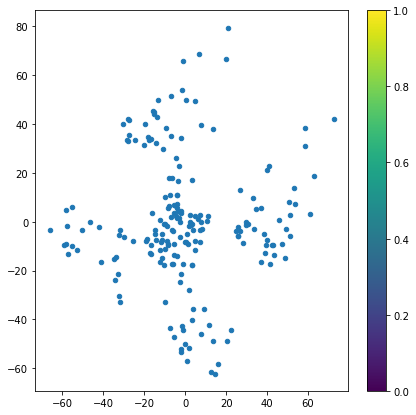

In [5]:
SEED = 42

pca = PCA(n_components=2, random_state=SEED).fit(X)
X_reduc = pca.transform(X)

#X_reduc = TSNE(n_components=2, random_state=SEED, metric='euclidean', n_jobs=-1).fit_transform(X)
plt.figure(figsize=(7, 7))
plt.scatter(X_reduc[:, 0], X_reduc[:, 1], s=20, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

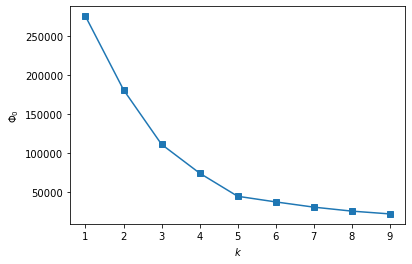

In [6]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_reduc)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$\Phi_0$');

/Users/natalya/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


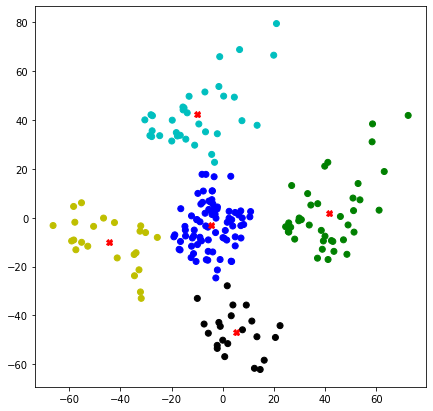

In [7]:
#fit
kmeans = KMeans(n_clusters=5, n_jobs=-1).fit(X_reduc)
#predict
yhat_kmeans = kmeans.predict(X_reduc) #=kmeans.labels_

#plot
colors = ['c' if x==0 else 'b' if x==1 else 'y' if x==2 else 'g' if x==3 else 'black' for x in yhat_kmeans]

plt.figure(figsize=(7,7))
for i in range(kmeans.cluster_centers_.shape[0]):
    plt.plot(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], 'rX')
plt.scatter(X_reduc[:,0], X_reduc[:,1], c=colors, picker=True);

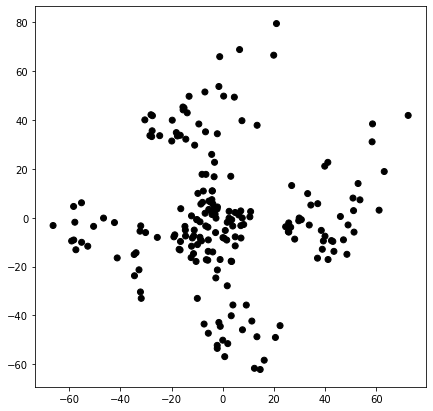

In [8]:
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1).fit(X_reduc)
yhat_dbscan = dbscan.labels_

#plot
colors = ['c' if x==0 else 'b' if x==1 else 'g' if x==2 else 'black' for x in yhat_dbscan]

plt.figure(figsize=(7,7))
plt.scatter(X_reduc[:,0], X_reduc[:,1], c=colors, picker=True);

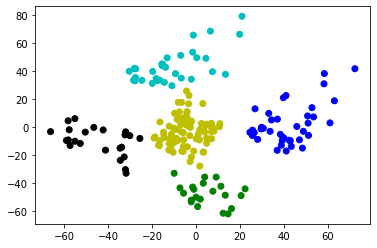

In [10]:
num_clus = 5
agclust = AgglomerativeClustering(n_clusters=num_clus, distance_threshold=None).fit(X_reduc)
yhat_agclust = agclust.labels_

colors = ['c' if x==0 else 'b' if x==1 else 'y' if x==2 else 'g' if x==3 else 'black' for x in yhat_agclust]
plt.scatter(X_reduc[:,0], X_reduc[:,1], c=colors, picker=True);

In [84]:
print(f'Silhouette score K-means: {silhouette_score(X_reduc, yhat_kmeans)}')
print(f'Silhouette score agglomerative clustering: {silhouette_score(X_reduc, yhat_agclust)}')
#print(f'Silhouette score DBSCAN: {silhouette_score(X_reduc, yhat_dbscan)}')

Silhouette score K-means: 0.4835430531357383
Silhouette score agglomerative clustering: 0.4886844574376897


## Задание 2 (по желанию)

Возьмем стандартный датасет ирисов, состоящий из 4-х признаков длины/ширины внутренней и наружной долей околоцветника и таргета - вид цветка (kind).

1.Требуется кластеризовать цветки (да-да, количество кластеров уже известно), посчитать **accuracy**. Выбор алгоритма опять же на усмотрение (может быть несколько)
<br>
**Важно**: метки могут расставиться в другом порядке относительно истинного таргета, то есть после кластеризации будут получены 0, а это на самом деле 1, то есть надо сделать отображение $0 \rightarrow 1$ , то же самое касается и других меток. 
<br>
Поэтому, получив метки кластеров, стоит перебрать все возможные их перестановки. В этом поможет itertools.permutations

2.Воспользоваться любым/любыми пройденными/известными алгоритмами классификации и посчитать **accuracy** 
<br>
(Например, логистической регрессией)

In [5]:
from sklearn import datasets
import itertools

##other libraries on need##

In [6]:
df = datasets.load_iris()
df = pd.DataFrame(np.hstack([df['data'], df['target'].reshape(-1,1)])
             , columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'kind'])

print('Count of unique flowers', df['kind'].unique().shape[0])
df.head()

Count of unique flowers 3


,sepal_length,sepal_width,petal_length,petal_width,kind
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Кластеризация

In [7]:
def validate_with_mappings(y_true, y_pred):
    '''
    Check all possible permutations to maximize accuracy
    '''
    
    l = []
    permutations = itertools.permutations([0, 1, 2])
    for a, b, c in permutations:
        mapping = {0 : a, 1: b, 2: c}
        mapped_preds = [mapping[pred] for pred in y_pred]
        l.append((mapping, sum(mapped_preds == y_true) / len(y_true)))
                 
    return l

In [8]:
X = df.iloc[:, :-1]
y = df['kind']

##твой код с выбором алгоритма ##

### Классификация

In [ ]:
##твой код##

**Вопрос**: что оказалось лучше: алгоритм классификации или кластеризации и на сколько?
<br>
**Ответ**: ****